In [734]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_data_complete = pd.merge(mouse_metadata, study_results, how="left", 
                                       on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice.
len(pymaceuticals_data_complete["Mouse ID"].unique())

249

In [21]:
print(type(pymaceuticals_data_complete))
print(type(pymaceuticals_data_complete["Mouse ID"]))
print(type(pymaceuticals_data_complete["Mouse ID"].unique()))
print(type(len(pymaceuticals_data_complete["Mouse ID"].unique())))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'int'>


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_data_complete["Mouse ID"].value_counts()
duplicate_mice= pymaceuticals_data_complete[pymaceuticals_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id= pymaceuticals_data_complete["Mouse ID"].drop_duplicates()
mouse_id_df= pymaceuticals_data_complete.loc[pymaceuticals_data_complete["Mouse ID"] != 'g989']
mouse_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice in the clean DataFrame.
len(mouse_id_df["Mouse ID"].unique())

248

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
mean= mouse_id_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median= mouse_id_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance= mouse_id_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev= mouse_id_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem= mouse_id_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df= pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
              "Standard Deviation": standard_dev, "SEM": sem})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_id_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                         ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<AxesSubplot:>

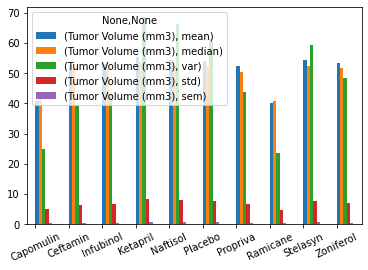

In [147]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen 
#using pandas.
index= ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
       'Ramicane', 'Stelasyn', 'Zoniferol']
pan_bar_df= pd.DataFrame(mouse_id_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                                  ['mean', 'median', 
                                                                   'var', 'std', 'sem']}), 
                         index=index)
pan_bar= pan_bar_df.plot.bar(rot=25, align="edge", legend="best")
pan_bar

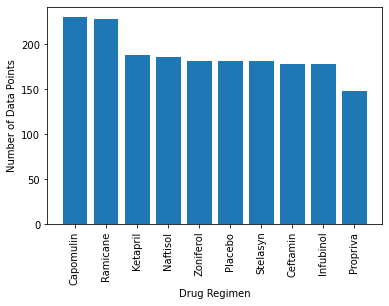

In [177]:
# Generate a bar plot showing the total number of measurements taken on each drug 
#regimen using pyplot.
counts = mouse_id_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


Text(0.5, 1.0, 'Distribution of Male vs. Female Mice')

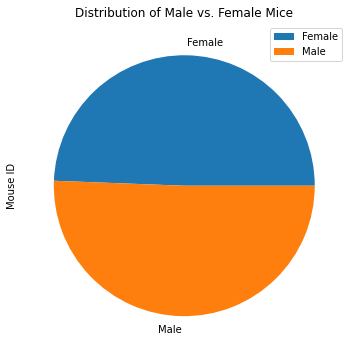

In [747]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pan_plot = gender_mice_df.plot.pie(subplots= True, figsize=(11,6))
plt.title("Distribution of Male vs. Female Mice")

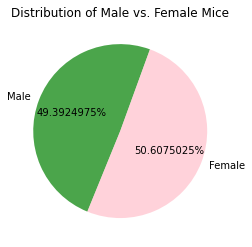

In [749]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice= pymaceuticals_data_complete.groupby(["Sex"])["Mouse ID"].count()
gender_mice_df= pd.DataFrame(gender_mice)
gender_mice_df
plt.pie(gender_mice, labels=['Male', 'Female'], startangle=70, 
        autopct='%.7f%%', colors=['green','pink'], wedgeprops={'alpha':0.7})
plt.title("Distribution of Male vs. Female Mice")
plt.show()

In [604]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
options= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
filtered_regimen= mouse_id_df[mouse_id_df['Drug Regimen'].isin(options)]
filtered_regimen_df= pd.DataFrame(filtered_regimen)
filtered_regimen_df.groupby(["Drug Regimen", "Timepoint"]).last()
mouse_timepoint= filtered_regimen_df[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)', 
                     'Timepoint']].groupby(['Mouse ID']).agg({'Timepoint': 'max'})

# Merge this group df with the original dataframe to get the tumor volume at the last 
#timepoint
mouse_timepoint_df= pd.merge(filtered_regimen_df, mouse_timepoint, how="right", 
                                       on=["Mouse ID", "Timepoint"])
mouse_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [655]:
# Put treatments into a list for for loop (and later for plot labels)

labels= ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
filtered_regimen_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [626]:
# Filter each treatment regimen: Ramicane, Capomulin, Infubinol, Ceftamin
ramicane_reg= mouse_timepoint_df.loc[mouse_timepoint_df["Drug Regimen"] == "Ramicane",:]
capomulin_reg= mouse_timepoint_df.loc[mouse_timepoint_df["Drug Regimen"] == "Capomulin"]
infubinol_reg= mouse_timepoint_df.loc[mouse_timepoint_df["Drug Regimen"] == "Infubinol"]
ceftamin_reg= mouse_timepoint_df.loc[mouse_timepoint_df["Drug Regimen"] == "Ceftamin"]

# To calculate outliers for the Ramicane Regimen
    # Isolate the last timepoint by Mouse ID for Ramicane
ramicane_timepoint= ramicane_reg.groupby(["Mouse ID"]).max()["Timepoint"]
    # Create a Data Frame for results
ramicane_vol_df= pd.DataFrame(ramicane_timepoint)
    # Merge the results with mouse_timepoint_df
ramicane_data= pd.merge(ramicane_vol_df, mouse_timepoint_df, on=("Mouse ID","Timepoint"),
                       how="left")

In [ ]:
# To calculate outliers for the Capomulin Regimen
    # Isolate the last timepoint by Mouse ID for Capomulin
capomulin_timepoint= capomulin_reg.groupby(["Mouse ID"]).max()["Timepoint"]
    # Create a Data Frame for results
capomulin_vol_df= pd.DataFrame(capomulin_timepoint)
     # Merge the results with mouse_timepoint_df
capomulin_data= pd.merge(capomulin_vol_df, mouse_timepoint_df, on=("Mouse ID","Timepoint"),
                         how="left")

In [631]:
# To calculate outliers for the Infubinol Regimen
    # Isolate the last timepoint by Mouse ID for Infubinol
infubinol_timepoint= infubinol_reg.groupby(["Mouse ID"]).max()["Timepoint"]
    # Create a Data Frame for results
infubinol_vol_df= pd.DataFrame(infubinol_timepoint)
    # Merge the results with mouse_timepoint_df
infubinol_data= pd.merge(infubinol_vol_df, mouse_timepoint_df, on=("Mouse ID","Timepoint"),
                         how="left")

In [633]:
# To calculate outliers for the Ceftamin Regimen
    # Isolate the last timepoint by Mouse ID for Ceftamin
ceftamin_timepoint= ceftamin_reg.groupby(["Mouse ID"]).max()["Timepoint"]
     # Create a Data Frame for results
ceftamin_vol_df= pd.DataFrame(ceftamin_timepoint)
    # Merge the results with mouse_timepoint_df
ceftamin_data= pd.merge(ceftamin_vol_df, mouse_timepoint_df, on=("Mouse ID", "Timepoint"), 
                        how="left")


In [643]:
# Ramicane: calculate the IQR and quantitatively determine if there are any potential outliers
ramicane_tumor_vol= ramicane_data["Tumor Volume (mm3)"]
    # To calculate Ramicane quartiles
ramicane_quartiles= ramicane_tumor_vol.quantile([0.25, 0.5, 0.75])
ramicane_lower_quartile= ramicane_quartiles[0.25]
ramicane_upper_quartile= ramicane_quartiles[0.75]
ramicane_iqr= ramicane_upper_quartile-ramicane_lower_quartile
    # To Print statements
print(f"The lower quartile of the tumors treated with Ramicane is: {ramicane_lower_quartile}")
print(f"The upper quartile of the tumors treated with Ramicane is: {ramicane_upper_quartile}")
print(f"The IQR of the tumors treated with Ramicane is: {ramicane_iqr}")

# Determine outliers using upper and lower bounds, +- (1.5*IQR)
ramicane_lower_bound= ramicane_lower_quartile - (1.5*ramicane_iqr)
ramicane_upper_bound= ramicane_upper_quartile + (1.5*ramicane_iqr)
    # To print statements
print(f"The values below {ramicane_lower_bound} could be outliers.")
print(f"The values above {ramicane_upper_bound} could be outliers.")


The lower quartile of the tumors treated with Ramicane is: 31.56046955
The upper quartile of the tumors treated with Ramicane is: 40.65900627
The IQR of the tumors treated with Ramicane is: 9.098536719999998
The values below 17.912664470000003 could be outliers.
The values above 54.30681135 could be outliers.


In [646]:
# Capomulin: calculate the IQR and quantitatively determine if there are any potential outliers
capomulin_tumor_vol= capomulin_data["Tumor Volume (mm3)"]     
    # To calculate Capomulin quartiles
capomulin_quartiles= capomulin_tumor_vol.quantile([0.25, 0.5, 0.75])
capomulin_lower_quartile= capomulin_quartiles[0.25]
capomulin_upper_quartile= capomulin_quartiles[0.75]
capomulin_iqr= capomulin_upper_quartile - capomulin_lower_quartile
    # To print statements
print(f"The lower quartile of the tumors treated with Capomulin is: {capomulin_lower_quartile}")
print(f"The upper quartile of the tumors treated with Capomulin is: {capomulin_upper_quartile}")
print(f"The IQR of the tumors treated with Capomulin is: {capomulin_iqr}")

The lower quartile of the tumors treated with Capomulin is: 32.37735684
The upper quartile of the tumors treated with Capomulin is: 40.1592203
The IQR of the tumors treated with Capomulin is: 7.781863460000004


In [649]:
# Infubinol: calculate the IQR and quantitatively determine if there are any potential outliers
infubinol_tumor_vol= infubinol_data["Tumor Volume (mm3)"]   
    # To calculate Infubinol quartiles
infubinol_quartiles= infubinol_tumor_vol.quantile([0.25, 0.5, 0.75])
infubinol_lower_quartile= infubinol_quartiles[0.25]
infubinol_upper_quartile= infubinol_quartiles[0.75]
infubinol_iqr= infubinol_upper_quartile - infubinol_lower_quartile 
    # To print statements
print(f"The lower quartile of the tumors treated with Infubinol is: {infubinol_lower_quartile}")
print(f"The upper quartile of the tumors treated with Infubinol is: {infubinol_upper_quartile}")
print(f"The IQR of the tumors treated with Infubinol is: {infubinol_iqr}")

The lower quartile of the tumors treated with Infubinol is: 54.04860769
The upper quartile of the tumors treated with Infubinol is: 65.52574285
The IQR of the tumors treated with Infubinol is: 11.477135160000003


In [652]:
# Ceftamin: calculate the IQR and quantitatively determine if there are any potential outliers
ceftamin_tumor_vol= ceftamin_data["Tumor Volume (mm3)"]    
    # To calculate Ceftamin quartiles
ceftamin_quartiles= ceftamin_tumor_vol.quantile([0.25, 0.5, 0.75])
ceftamin_lower_quartile= ceftamin_quartiles[0.25]
ceftamin_upper_quartile= ceftamin_quartiles[0.75]
ceftamin_iqr= ceftamin_upper_quartile - ceftamin_lower_quartile
    # To print statements
print(f"The lower quartile of the tumors treated with Ceftamin is: {ceftamin_lower_quartile}")
print(f"The upper quartile of the tumors treated with Ceftamin is: {ceftamin_upper_quartile}")
print(f"The IQR of the tumors treated with Ceftamin is: {ceftamin_iqr}")

The lower quartile of the tumors treated with Ceftamin is: 48.72207785
The upper quartile of the tumors treated with Ceftamin is: 64.29983003
The IQR of the tumors treated with Ceftamin is: 15.577752179999997


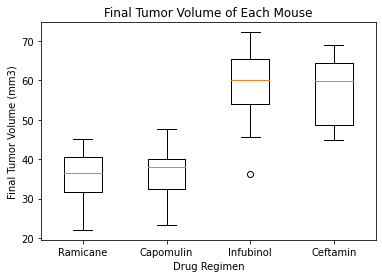

In [654]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mice_plot= [ramicane_tumor_vol, capomulin_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
labels= ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
plt.title('Final Tumor Volume of Each Mouse')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.boxplot(mice_plot, labels=labels)
plt.show()

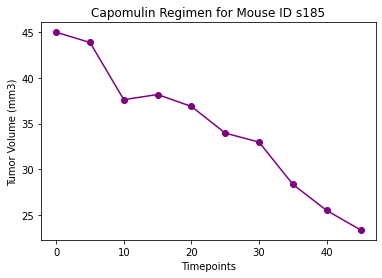

In [696]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    # Filter for mouse s185
capomulin_mice= mouse_id_df.loc[mouse_id_df["Drug Regimen"] == "Capomulin"]
mouse_s185= capomulin_mice.loc[capomulin_mice["Mouse ID"] == "s185"]

x_axis= mouse_s185["Timepoint"]
tumor_vol= mouse_s185["Tumor Volume (mm3)"]
plt.title("Capomulin Regimen for Mouse ID s185")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, tumor_vol, marker="o", color="purple")
plt.show()

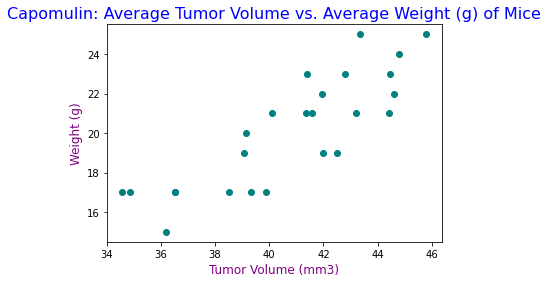

In [724]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin= capomulin_mice.groupby(["Mouse ID"]).mean()
plt.scatter(avg_capomulin["Tumor Volume (mm3)"],avg_capomulin["Weight (g)"], color="teal")
plt.title("Capomulin: Average Tumor Volume vs. Average Weight (g) of Mice", color= "blue", fontsize= 16)
plt.xlabel("Tumor Volume (mm3)", color= "purple", fontsize= 12)
plt.ylabel("Weight (g)", color= "purple", fontsize= 12)
plt.show()

In [727]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation= st.pearsonr(avg_capomulin["Weight (g)"],avg_capomulin["Tumor Volume (mm3)"])[0]
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.8419363424694717


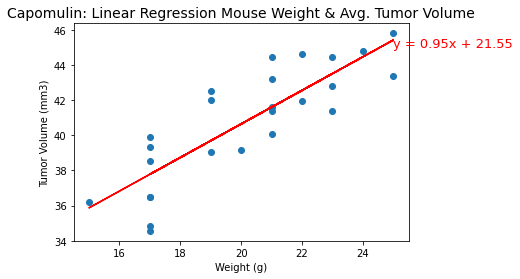

The r-squared is: 0.7088568047708717


In [746]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen  
x_values= avg_capomulin["Weight (g)"]
y_values= avg_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (25,45),fontsize=13,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin: Linear Regression Mouse Weight & Avg. Tumor Volume", fontsize= 14)
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [750]:
# Observations and Insights 
1. In calculating the correlation coefficient between the average weight of the mice and 
the average tumor volume for the drug regimen, Capomulin; the results show that there is a 
strong correlation between the average weight of the mice and the average tumor volume.

2. The R-squared value of approximately 0.71 in the Capomulin regimen data indicates that the 
mice weight does not generally follow the movements of the tumor volume. 

3. The final tumor volume of the regimen of interest 
(Ramicane, Capomulin, Infubinol, and Ceftamin), indicate that Ramicane and Capomulin prduced
favorable results in the tumor volume. Based upon this data, it would seem that Ramicane was more 
effective in reducing the volume of the tumor in the mice. 

SyntaxError: invalid syntax (<ipython-input-750-4fe5bb8a5214>, line 2)